**Testing for Laplacian and Gaussian Mechansim while adding nosie to Patient data**



Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


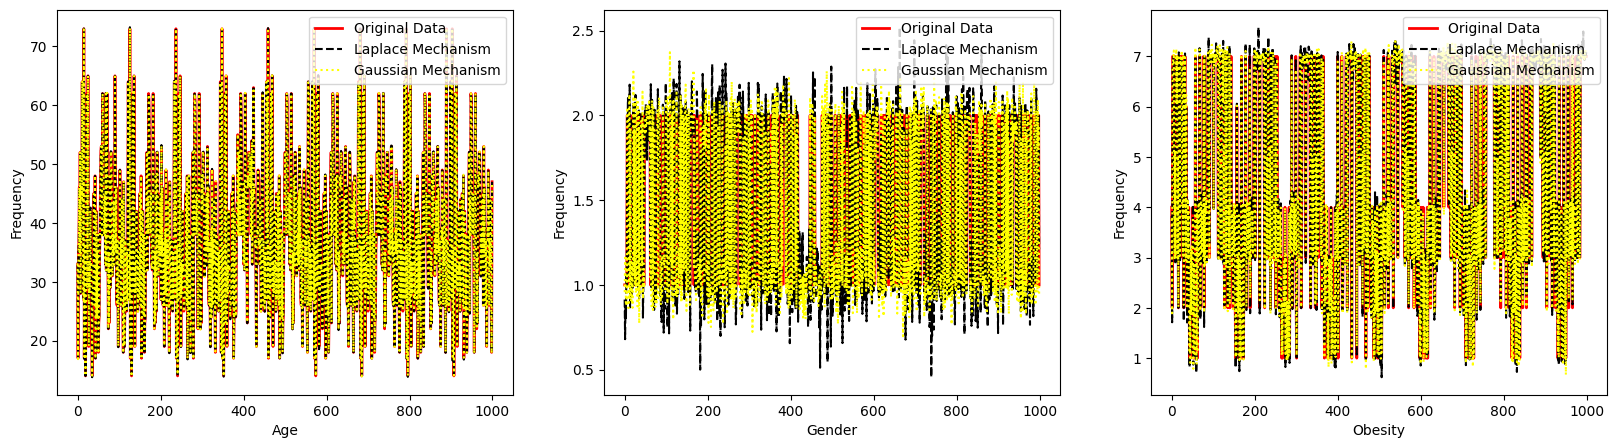

Epsilon Values
[ 0.1         2.31111111  4.52222222  6.73333333  8.94444444 11.15555556
 13.36666667 15.57777778 17.78888889 20.        ]
RMSE for Laplacin
[Age        10.062904
Gender     10.391905
Obesity     9.830975
dtype: float64, Age        0.437045
Gender     0.432424
Obesity    0.440760
dtype: float64, Age        0.223527
Gender     0.224654
Obesity    0.217615
dtype: float64, Age        0.147480
Gender     0.149020
Obesity    0.139777
dtype: float64, Age        0.106328
Gender     0.108422
Obesity    0.106250
dtype: float64, Age        0.090523
Gender     0.091081
Obesity    0.088350
dtype: float64, Age        0.075312
Gender     0.076096
Obesity    0.075404
dtype: float64, Age        0.065130
Gender     0.068322
Obesity    0.064952
dtype: float64, Age        0.052680
Gender     0.057158
Obesity    0.055827
dtype: float64, Age        0.048906
Gender     0.049915
Obesity    0.052411
dtype: float64]
RMSE for Gaussian
[Age        7.632085
Gender     7.983990
Obesity    7.795725
d

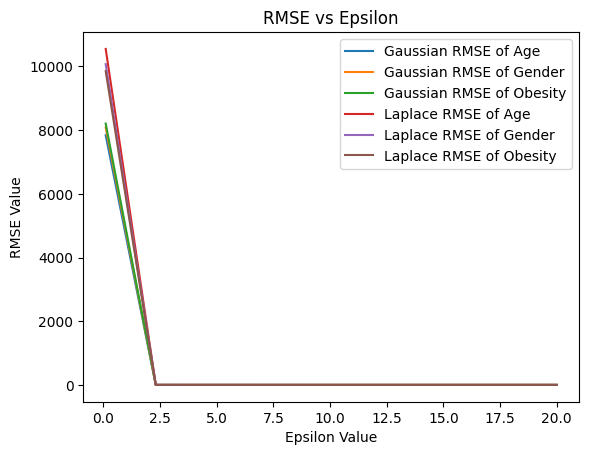

In [2]:
#1st
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
import csv

# Mount Google Drive
drive.mount('/content/drive/')

# Load the dataset from a CSV file
working_dir = '/content/drive/MyDrive/DP_Tests'
patient_data = pd.read_csv(f'{working_dir}/patient_data.csv')

# Identify the sensitive attributes in the data
sensitive_attributes = ['Age', 'Gender', 'Obesity']

# Choose a privacy model - Laplace mechanism
def laplace_mechanism(data, epsilon):
    noise = np.random.laplace(0, 1/epsilon, len(data))
    return data + noise

# Choose a privacy model - Gaussian mechanism
def gaussian_mechanism(data, epsilon):
    noise = np.random.normal(0, 1/epsilon, len(data))
    return data + noise

# Add noise to the sensitive attributes using the Laplace mechanism
epsilon_laplace = 10
for attr in sensitive_attributes:
    patient_data[attr+'_laplace'] = laplace_mechanism(patient_data[attr].values, epsilon_laplace)

# Add noise to the sensitive attributes using the Gaussian mechanism
epsilon_gaussian = 10
for attr in sensitive_attributes:
    patient_data[attr+'_gaussian'] = gaussian_mechanism(patient_data[attr].values, epsilon_gaussian)

# Plot a graph to compare the results of both mechanisms
fig, axs = plt.subplots(1, len(sensitive_attributes), figsize=(20,5))

for i, attr in enumerate(sensitive_attributes):
    axs[i].plot(patient_data[attr].values, linewidth=2, color='red',label='Original Data')
    axs[i].plot(patient_data[attr+'_laplace'].values, color='black', linestyle='dashed', label='Laplace Mechanism')
    axs[i].plot(patient_data[attr+'_gaussian'].values, color='yellow', linestyle='dotted',label='Gaussian Mechanism')
    axs[i].set_xlabel(attr)
    axs[i].set_ylabel('Frequency')
    axs[i].legend(loc='upper right')

plt.show()


# Choose a range of epsilon values to test
epsilon_range = np.linspace(0.1, 20,10)
#20 data 

# Calculate RMSE for each attribute and mechanism at each value of epsilon
rmse_laplace = []
rmse_gaussian = []
for epsilon in epsilon_range:
    laplace_data = patient_data[sensitive_attributes].apply(lambda x: laplace_mechanism(x.values, epsilon))
    gaussian_data = patient_data[sensitive_attributes].apply(lambda x: gaussian_mechanism(x.values, epsilon))
    rmse_laplace.append(np.mean(np.abs(laplace_data - patient_data[sensitive_attributes])))
    rmse_gaussian.append(np.mean(np.abs(gaussian_data - patient_data[sensitive_attributes])))
    

# Plot RMSE epsilon for each mechanism
plt.clf()
#print(epsilon_range.shape())
#plt.plot(epsilon_range, rmse_laplace, label='Laplace Mechanism')
#plt.plot(epsilon_range, rmse_gaussian, label='Gaussian Mechanism')
#plt.xlabel('Epsilon')
#plt.ylabel('Root Mean Square Error')
#plt.ylabel('Mean Absolute Error')
#plt.legend()

print("Epsilon Values")
print(epsilon_range)
print("RMSE for Laplacin")
print(rmse_laplace)
print("RMSE for Gaussian")
print(rmse_gaussian)


#Data values for Epsilon and RMSE
epsilon = [0.1, 2.31, 4.52, 6.73, 8.94, 11.15, 13.36, 15.57, 17.78, 20.00]
Lrmse_age = [10551, 0.424, 0.217, 0.144, 0.116, 0.088, 0.074, 0.063, 0.057, 0.049]
Lrmse_gender = [10072, 0.432, 0.209, 0.146, 0.112, 0.092, 0.076, 0.065, 0.053, 0.050]
Lrmse_obesity = [9852, 0.456, 0.221, 0.153, 0.112, 0.088, 0.079, 0.064, 0.055, 0.049]
epsilon = [0.1, 2.31, 4.52, 6.73, 8.94, 11.15, 13.36, 15.57, 17.78, 20.00]
rmse_age = [7840, 0.344, 0.183, 0.119, 0.089, 0.073, 0.059, 0.051, 0.045, 0.039]
rmse_gender = [8081, 0.348, 0.179, 0.119, 0.088, 0.069, 0.059, 0.051, 0.045, 0.040]
rmse_obesity = [8208, 0.343, 0.180, 0.121, 0.086, 0.071, 0.058, 0.050, 0.045, 0.041]
# Create the line chart
plt.plot(epsilon, rmse_age, label="Gaussian RMSE of Age")
plt.plot(epsilon, rmse_gender, label="Gaussian RMSE of Gender")
plt.plot(epsilon, rmse_obesity, label="Gaussian RMSE of Obesity")
plt.plot(epsilon, Lrmse_age, label="Laplace RMSE of Age")
plt.plot(epsilon, Lrmse_gender, label="Laplace RMSE of Gender")
plt.plot(epsilon, Lrmse_obesity, label="Laplace RMSE of Obesity")
# Add axis labels and legend
plt.xlabel("Epsilon Value")
plt.ylabel("RMSE Value")
plt.title("RMSE vs Epsilon")
plt.legend()

# Display the chart
plt.savefig('GGC.png')

# Compare each mechanisms for different values of epsilon
epsilons = [0.1, 0.5, 1.0, 5.0, 10.0]
for attr in sensitive_attributes:
    laplace_rmse = []
    gaussian_rmse = []
    for eps in epsilons:
        laplace_data = laplace_mechanism(patient_data[attr].values, eps)
        gaussian_data = gaussian_mechanism(patient_data[attr].values, eps)
        laplace_rmse.append(np.sqrt(np.mean(np.square(laplace_data - patient_data[attr].values))))
        gaussian_rmse.append(np.sqrt(np.mean(np.square(gaussian_data - patient_data[attr].values))))
    print(f'{attr}:')
    print(f'  Laplace Mechanism RMSE: {laplace_rmse}')
    print(f'  Gaussian Mechanism RMSE: {gaussian_rmse}')
    if min(laplace_rmse) < min(gaussian_rmse):
      print(f'  Laplace mechanism is better for {attr} because it has a smaller RMSE value.')
    elif  min(gaussian_rmse) < min(laplace_rmse):
      print(f'  Gaussian mechanism is better for {attr} because it has a smaller RMSE value.')
    else: print(f'  Both mechanisms have the same RMSE value for {attr}.')


In [ ]:
#2
import numpy as np
import os
import matplotlib.pyplot as plt
import os
# Generate a random dataset of patient data
n_samples = 1000
patient_data = np.random.normal(loc=0, scale=1, size=n_samples)

# Apply the Gaussian mechanism to the patient data
epsilon =10.0
sensitivity = 1.0
sigma = sensitivity / epsilon
noisy_data_gaussian = patient_data + np.random.normal(loc=0, scale=sigma, size=n_samples)

# Apply the Laplace mechanism to the patient data
epsilon = 1.0
sensitivity = 1.0
b = sensitivity / epsilon
noisy_data_laplace = patient_data + np.random.laplace(loc=0, scale=b, size=n_samples)

# Plot the histograms of the noisy datasets
plt.hist(patient_data, bins=30, alpha=0.5, label='Patient Data')
plt.hist(noisy_data_gaussian, bins=30, alpha=0.5, label='Gaussian Mechanism')
plt.hist(noisy_data_laplace, bins=30, alpha=0.5, label='Laplace Mechanism')
plt.legend(loc='upper right')
plt.show()


In [ ]:
#3
import numpy as np
import matplotlib.pyplot as plt

# Generate a random dataset of patient data
n_samples = 1000
patient_data = np.random.normal(loc=0, scale=1, size=n_samples)

# Apply the Gaussian mechanism to the patient data
epsilon = 1.0
sigma = 1.0 / epsilon
noisy_data_gaussian = patient_data + np.random.normal(loc=0, scale=sigma, size=n_samples)

# Apply the Laplace mechanism to the patient data
epsilon = 1.0
b = 1.0 / epsilon
noisy_data_laplace = patient_data + np.random.laplace(loc=0, scale=b, size=n_samples)

# Plot the histograms of the noisy datasets
plt.hist(patient_data, bins=30, alpha=0.5, label='Patient Data')
plt.hist(noisy_data_gaussian, bins=30, alpha=0.5, label='Gaussian Mechanism')
plt.hist(noisy_data_laplace, bins=30, alpha=0.5, label='Laplace Mechanism')
plt.legend(loc='upper right')
plt.show()
plt.savefig("comaprison.png")

In [ ]:
#4
import numpy as np
import matplotlib.pyplot as plt

# Generate a random dataset of patient data
n_samples = 1000
patient_data = np.random.normal(loc=0, scale=1, size=n_samples)

# Apply the Gaussian mechanism and Laplace mechanism for different values of epsilon
epsilons = np.linspace(0.1, 10.0, num=50)
mse_gaussian = []
mse_laplace = []

for epsilon in epsilons:
    sigma = 1.0 / epsilon
    noisy_data_gaussian = patient_data + np.random.normal(loc=0, scale=sigma, size=n_samples)
    mse_gaussian.append(np.mean((noisy_data_gaussian - patient_data) ** 2))
    
    b = 1.0 / epsilon
    noisy_data_laplace = patient_data + np.random.laplace(loc=0, scale=b, size=n_samples)
    mse_laplace.append(np.mean((noisy_data_laplace - patient_data) ** 2))

# Plot the MSE for the Gaussian mechanism and the Laplace mechanism
plt.plot(epsilons, mse_gaussian, label='Gaussian Mechanism')
plt.plot(epsilons, mse_laplace, label='Laplace Mechanism')
plt.xlabel('Epsilon')
plt.ylabel('Mean Squared Error')
plt.title('Data Privacy-Utility Trade-Off')
plt.legend()
plt.show()


In [ ]:
#5
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive/')

# Load the dataset from a CSV file
working_dir = '/content/drive/MyDrive/DP_Tests'
file_path = f'{working_dir}/COVID.csv'
data = pd.read_csv(file_path)

# Replace NaN values with mean of the column
data = data.fillna(data.mean())

# Extract the column of sensitive data
sensitive_data = data['Gender']
sensitive_data = data['Age']
sensitive_data = data['Alcohol use']
sensitive_data = data['Dust Allergy']

# Load the dataset from a CSV file
#data = pd.read_csv('COVID.csv', encoding='latin1')

# Extract the column of sensitive data
#sensitive_data = data['Age']

# Add Gaussian noise using the Gaussian mechanism
eps = 10.0
delta = 1e-5
stddev = sqrt(2.0 * np.log(1.25 / delta)) / eps
noisy_data_gaussian = sensitive_data + np.random.normal(loc=0, scale=stddev, size=len(sensitive_data))

# Add Laplace noise using the Laplace mechanism
eps = 10.0
sensitivity = 1.0
scale = sensitivity / eps
noisy_data_laplace = sensitive_data + np.random.laplace(loc=0, scale=scale, size=len(sensitive_data))

# Calculate the mean squared error between the original data and the noisy data
mse_gaussian = mean_squared_error(sensitive_data, noisy_data_gaussian)
mse_laplace = mean_squared_error(sensitive_data, noisy_data_laplace)

# Plot the results
plt.hist(sensitive_data, bins=50, alpha=0.5, label='Original')
plt.hist(noisy_data_gaussian, bins=50, alpha=0.5, label='Gaussian')
plt.hist(noisy_data_laplace, bins=50, alpha=0.5, label='Laplace')
plt.legend(loc='upper right')
plt.show()

# Print the MSE for each mechanism
print('MSE Gaussian:', mse_gaussian)
print('MSE Laplace:', mse_laplace)

# Determine which mechanism is better based on MSE
if mse_gaussian < mse_laplace:
    print('Gaussian mechanism is better.')
else:
    print('Laplace mechanism is better.')


In [ ]:
#6
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive/')

# Load the dataset from a CSV file
working_dir = '/content/drive/MyDrive/DP_Tests'
patient_data = pd.read_csv(f'{working_dir}/patient_data.csv')

# Identify the sensitive attributes in the data
sensitive_attributes = ['Age', 'Gender']

# Choose a privacy model - Laplace mechanism
def laplace_mechanism(data, epsilon):
    noise = np.random.laplace(0, 1/epsilon, len(data))
    return data + noise

# Choose a privacy model - Gaussian mechanism
def gaussian_mechanism(data, epsilon):
    noise = np.random.normal(0, 1/epsilon, len(data))
    return data + noise

# Add noise to the sensitive attributes using the Laplace mechanism
epsilon_laplace = 1.0
for attr in sensitive_attributes:
    if patient_data[attr].dtype != 'O':  # exclude columns of string data type
        patient_data[attr+'_laplace'] = laplace_mechanism(patient_data[attr].values, epsilon_laplace)

# Add noise to the sensitive attributes using the Gaussian mechanism
epsilon_gaussian = 0.5
for attr in sensitive_attributes:
    if patient_data[attr].dtype != 'O':  # exclude columns of string data type
        patient_data[attr+'_gaussian'] = gaussian_mechanism(patient_data[attr].values, epsilon_gaussian)

# Plot a graph to compare the results of both mechanisms
fig, axs = plt.subplots(1, len(sensitive_attributes), figsize=(20,5))

for i, attr in enumerate(sensitive_attributes):
    if patient_data[attr].dtype != 'O':  # exclude columns of string data type
        axs[i].hist(patient_data[attr].values, bins=50, alpha=0.5, label='Original Data')
        axs[i].hist(patient_data[attr+'_laplace'].values, bins=50, alpha=0.5, label='Laplace Mechanism')
        axs[i].hist(patient_data[attr+'_gaussian'].values, bins=50, alpha=0.5, label='Gaussian Mechanism')
        axs[i].set_xlabel(attr)
        axs[i].set_ylabel('Frequency')
        axs[i].legend(loc='upper right')

plt.show()

# Choose a range of epsilon values to test
epsilon_range = np.linspace(0.1, 10, 20)

# Calculate MAE for each attribute and mechanism at each value of epsilon
mae_laplace = []
mae_gaussian = []
for epsilon in epsilon_range:
    laplace_data = patient_data[sensitive_attributes].apply(lambda x: laplace_mechanism(x.values, epsilon))
    gaussian_data = patient_data[sensitive_attributes].apply(lambda x: gaussian_mechanism(x.values, epsilon))
    mae_laplace.append(np.mean(np.abs(laplace_data - patient_data[sensitive_attributes])))
    mae_gaussian.append(np.mean(np.abs(gaussian_data - patient_data[sensitive_attributes])))

# Plot MAE vs epsilon for each mechanism
plt.plot(epsilon_range, mae_laplace, label='Laplace Mechanism')
plt.plot(epsilon_range, mae_gaussian, label='Gaussian Mechanism')
plt.xlabel('Epsilon')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.show()

